In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
#anadolu hayat emekliliğe ait bes ile ilgili verilerin bulunduğu veri seti
#df = pd.read_csv("C:\\Users\\melih.bayraktaroglu\\Desktop\\train-utf8-ahe.csv")
#anadolu hayat emekliliğe ait bes ile ilgili verilerin bulunduğu veri seti
df = pd.read_csv("C:\\Users\\melih\\Desktop\\train-utf8-ahe.csv")

#C:\Users\melih\Desktop

KEŞİFSEL VERİ ANALİZİ(EDA) 

In [42]:

#pd.set_option('display.max_columns', 100)  
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634112 entries, 0 to 634111
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POLICY_ID               634112 non-null  int64  
 1   OFFICE_ID               634112 non-null  int64  
 2   SIGORTA_TIP             634112 non-null  int64  
 3   SOZLESME_KOKENI         634112 non-null  object 
 4   SOZLESME_KOKENI_DETAY   627896 non-null  object 
 5   BASLANGIC_TARIHI        634112 non-null  object 
 6   KAPSAM_TIPI             634112 non-null  object 
 7   KAPSAM_GRUBU            634112 non-null  object 
 8   DAGITIM_KANALI          634106 non-null  object 
 9   POLICE_SEHIR            632176 non-null  object 
 10  DOGUM_TARIHI            634112 non-null  int64  
 11  CINSIYET                634112 non-null  int64  
 12  UYRUK                   634001 non-null  object 
 13  MEMLEKET                634112 non-null  int64  
 14  MESLEK              

In [43]:
df.head(10)

POLICY_ID  OFFICE_ID  SIGORTA_TIP SOZLESME_KOKENI SOZLESME_KOKENI_DETAY  \
0    7203428      10099            7             NEW                   NEW   
1    2857821      10100            7             NEW                   NEW   
2    7833031      10042            1             NEW                   NEW   
3    4474944      10056            7             NEW                   NEW   
4    4660085      10068            7             NEW                   NEW   
5    4736561      10168            7             NEW               NEW_MRG   
6    8167943      10006            8             NEW                   NEW   
7    2420140      10213            1             NEW                   NEW   
8    5548250      10222            1             NEW                   NEW   
9    1127870      10230            6             NEW                   NEW   

  BASLANGIC_TARIHI KAPSAM_TIPI          KAPSAM_GRUBU   DAGITIM_KANALI  \
0          2014-04  PENSION318          STD BİREYSEL           Kanal7   
1          2016-09  PENSION419  KATILIM STD BİREYSEL  Kanal4 + Kanal2   
2          2016-07  PENSION250             EV HANIMI  Kanal4 + Kanal2   
3          2014-09  PENSION434          KATILIM GRUP  Kanal4 + Kanal2   
4          2008-04  PENSION100              STD GRUP  Kanal4 + Kanal2   
5          2010-08  PENSION059              STD GRUP  Kanal4 + Kanal2   
6          2018-12  PENSION329                   OKS  Kanal4 + Kanal2   
7          2015-12  PENSION194             EV HANIMI  Kanal4 + Kanal2   
8          2017-01  PENSION250             EV HANIMI  Kanal4 + Kanal2   
9          2016-02  PENSION028              STD GRUP  Kanal4 + Kanal2   

  POLICE_SEHIR  ...  EYLUL_VADE_TUTARI  EKIM_ODENEN_TUTAR EKIM_VADE_TUTARI  \
0    ESKİŞEHİR  ...              220.0                220            220.0   
1    BALIKESİR  ...              160.0                160            160.0   
2    BALIKESİR  ...              256.0                256            256.0   
3       SAMSUN  ...              150.0                150            150.0   
4     İSTANBUL  ...              100.0                100            100.0   
5     İSTANBUL  ...              250.0                250            250.0   
6     İSTANBUL  ...              120.0                  0            120.0   
7          NaN  ...              430.0                430            430.0   
8     NEVŞEHİR  ...              280.0                280            280.0   
9       ANKARA  ...               97.0                  0             97.0   

   KASIM_ODENEN_TUTAR KASIM_VADE_TUTARI ARALIK_ODENEN_TUTAR  \
0                 220             220.0                 220   
1                 160             160.0                 160   
2                 256             256.0                 256   
3                 150             150.0                 150   
4                 100             100.0                 100   
5                 250             250.0                 250   
6                   0             120.0                   0   
7                 430             430.0                 430   
8                 280             280.0                 280   
9                   0              97.0                   0   

   ARALIK_VADE_TUTARI SENE_BASI_HESAP_DEGERI SENE_SONU_HESAP_DEGERI  \
0               220.0               15248.75               25684.25   
1               160.0                5842.71               10104.56   
2               256.0                3782.86                7060.94   
3               150.0                6855.03               12645.25   
4               100.0               27837.75               31613.07   
5               250.0               46113.02               57644.05   
6               120.0                 407.26                 462.37   
7               430.0               19800.67               26823.51   
8               280.0                9333.31               13690.83   
9                97.0                 501.96                 519.72   

  ART

In [44]:
df.isnull().sum() 

POLICY_ID                      0
OFFICE_ID                      0
SIGORTA_TIP                    0
SOZLESME_KOKENI                0
SOZLESME_KOKENI_DETAY       6216
BASLANGIC_TARIHI               0
KAPSAM_TIPI                    0
KAPSAM_GRUBU                   0
DAGITIM_KANALI                 6
POLICE_SEHIR                1936
DOGUM_TARIHI                   0
CINSIYET                       0
UYRUK                        111
MEMLEKET                       0
MESLEK                     66860
MESLEK_KIRILIM             69138
MUSTERI_SEGMENTI               3
YATIRIM_KARAKTERI         558253
MEDENI_HAL                  3199
EGITIM_DURUM              149795
GELIR                      77644
COCUK_SAYISI              118108
OCAK_ODENEN_TUTAR              0
OCAK_VADE_TUTARI               0
SUBAT_ODENEN_TU                0
SUBAT_VADE_TUTARI              0
MART_ODENEN_TUTAR              0
MART_VADE_TUTARI               0
NISAN_ODENEN_TUTAR             0
NISAN_VADE_TUTARI              0
MAYIS_ODEN

In [45]:
df.describe()

POLICY_ID      OFFICE_ID    SIGORTA_TIP   DOGUM_TARIHI  \
count  6.341120e+05  634112.000000  634112.000000  634112.000000   
mean   5.494078e+06   10331.388616       2.536787    1977.635951   
std    2.591409e+06     394.586501       2.600031      11.089851   
min    1.000050e+06   10000.000000       1.000000    1921.000000   
25%    3.247899e+06   10006.000000       1.000000    1970.000000   
50%    5.497920e+06   10152.000000       1.000000    1978.000000   
75%    7.739650e+06   10556.000000       6.000000    1986.000000   
max    9.989995e+06   11756.000000       8.000000    2004.000000   

            CINSIYET       MEMLEKET  MUSTERI_SEGMENTI   COCUK_SAYISI  \
count  634112.000000  634112.000000     634109.000000  516004.000000   
mean        1.512749       1.007111        104.381958       0.103978   
std         0.499838       0.106431          1.521238       0.476119   
min         1.000000       1.000000        101.000000       0.000000   
25%         1.000000       1.000000        103.000000       0.000000   
50%         2.000000       1.000000        105.000000       0.000000   
75%         2.000000       1.000000        106.000000       0.000000   
max         2.000000       3.000000        106.000000      20.000000   

       OCAK_ODENEN_TUTAR  OCAK_VADE_TUTARI  ...  EYLUL_VADE_TUTARI  \
count      634112.000000     634112.000000  ...      634112.000000   
mean          204.457101        314.880687  ...         319.867055   
std           341.238882        524.090417  ...         531.193229   
min             0.000000         17.000000  ...          17.000000   
25%             0.000000        170.000000  ...         175.400000   
50%           160.000000        228.000000  ...         230.000000   
75%           270.000000        340.000000  ...         340.000000   
max         20000.000000     300000.000000  ...      300000.000000   

       EKIM_ODENEN_TUTAR  EKIM_VADE_TUTARI  KASIM_ODENEN_TUTAR  \
count      634112.000000     634112.000000        634112.00000   
mean          205.880207        320.278836           207.03685   
std           355.802037        378.089592           359.67794   
min             0.000000         17.000000             0.00000   
25%             0.000000        180.000000             0.00000   
50%           150.000000        230.000000           150.00000   
75%           270.000000        340.000000           270.00000   
max         25000.000000      91790.000000         25000.00000   

       KASIM_VADE_TUTARI  ARALIK_ODENEN_TUTAR  ARALIK_VADE_TUTARI  \
count      634112.000000        634112.000000       634112.000000   
mean          321.511360           207.069934          322.006480   
std           381.002012           363.207548          385.170653   
min            17.000000             0.000000            1.000000   
25%           180.000000             0.000000          180.000000   
50%           230.000000           150.000000          230.000000   
75%           340.000000           270.000000          340.000000   
max         91790.000000         35316.000000        91790.000000   

       SENE_BASI_HESAP_DEGERI  SENE_SONU_HESAP_DEGERI   ARTIS_DURUMU  
count            6.341120e+05            6.341120e+05  634112.000000  
mean             1.254184e+04            1.853683e+04       0.086953  
std              2.968496e+04            4.176051e+04       0.281767  
min             -2.573100e+02           -8.704000e+01       0.000000  
25%              5.740000e+02            8.073850e+02       0.000000  
50%              4.040035e+03            7.106740e+03       0.000000  
75%              1.280310e+04            1.938024e+04       0.000000  
max              3.784300e+06            5.006796e+06       1.000000  

[8 rows x 35 columns]

In [46]:
df = df.rename(columns = {"SUBAT_ODENEN_TU": "SUBAT_ODENEN_TUTAR" })

In [47]:
pd.set_option('display.max_rows', None)

df["UYRUK"].value_counts()

UYRUK
TR     630849
DE       1486
OT        491
IR        162
AT        147
AZ         85
NL         85
TM         77
IQ         54
SY         46
NCY        38
GB         35
UZ         34
RU         33
BG         33
DK         31
UA         25
AF         24
GR         24
GE         18
MD         18
KZ         16
CN         15
US         14
KG         12
FR         12
NO          9
BY          7
MA          6
AL          6
MK          6
IL          5
EG          5
JO          4
PK          4
IT          4
DZ          4
NG          4
LI          4
IN          3
RS          3
CA          3
TJ          3
KSV         3
PS          3
ES          3
ID          3
TN          2
BA          2
CS          2
SE          2
KR          2
CO          2
AU          2
RO          2
CH          2
BE          2
YE          2
LY          2
PH          1
LV          1
JP          1
BD          1
ER          1
MX          1
CY          1
ME          1
CZ          1
IO          1
UG          1
PL          1


In [48]:
#şehir sayısı
distinct_count = df['POLICE_SEHIR'].nunique()
print(f"Distinct değer sayısı: {distinct_count}")

Distinct değer sayısı: 603


In [49]:
#veri analizi şehirlere ait poliçe sayısı
value_counts = df['POLICE_SEHIR'].value_counts()
filtered_counts = value_counts[value_counts > 1000]
#print(filtered_counts.to_string())
print(filtered_counts)

print(f"Distinct değer sayısı: {filtered_counts.index.nunique()}")
print(filtered_counts.index.tolist())




POLICE_SEHIR
İSTANBUL      144353
ANKARA         56158
İZMİR          51172
ANTALYA        27031
BURSA          23073
ADANA          18613
KOCAELİ        16082
MERSİN         16044
MUĞLA          12619
DENİZLİ        12543
AYDIN          12226
BALIKESİR      11696
HATAY          11613
MANİSA         11370
KONYA          11321
ESKİŞEHİR       9074
GAZİANTEP       9060
KAYSERİ         8856
TEKİRDAĞ        7963
TRABZON         6938
SAMSUN          6648
SAKARYA         6461
ZONGULDAK       5745
ÇANAKKALE       5452
K.MARAŞ         5143
ORDU            5120
DİYARBAKIR      4788
UŞAK            4766
EDİRNE          4687
ISPARTA         4686
ŞANLIURFA       4248
MALATYA         4027
ADIYAMAN        3728
KIRKLARELİ      3685
AFYON           3287
KÜTAHYA         3282
GİRESUN         3131
OSMANİYE        3070
SİVAS           2678
AMASYA          2639
YOZGAT          2635
TOKAT           2633
VAN             2574
ERZURUM         2554
RİZE            2492
NEVŞEHİR        2492
KASTAMONU       2485


In [50]:
print(df["ARTIS_DURUMU"].value_counts())    
print(df["ARTIS_DURUMU"].value_counts(normalize=True))

ARTIS_DURUMU
0    578974
1     55138
Name: count, dtype: int64
ARTIS_DURUMU
0    0.913047
1    0.086953
Name: proportion, dtype: float64


In [51]:
df_islenmis = df[df['POLICE_SEHIR'].isin(filtered_counts.index.tolist())]
print(f"Distinct değer sayısı: {df_islenmis.count()}")




Distinct değer sayısı: POLICY_ID                 623400
OFFICE_ID                 623400
SIGORTA_TIP               623400
SOZLESME_KOKENI           623400
SOZLESME_KOKENI_DETAY     617228
BASLANGIC_TARIHI          623400
KAPSAM_TIPI               623400
KAPSAM_GRUBU              623400
DAGITIM_KANALI            623394
POLICE_SEHIR              623400
DOGUM_TARIHI              623400
CINSIYET                  623400
UYRUK                     623289
MEMLEKET                  623400
MESLEK                    557589
MESLEK_KIRILIM            555387
MUSTERI_SEGMENTI          623397
YATIRIM_KARAKTERI          74682
MEDENI_HAL                620226
EGITIM_DURUM              476638
GELIR                     546915
COCUK_SAYISI              507806
OCAK_ODENEN_TUTAR         623400
OCAK_VADE_TUTARI          623400
SUBAT_ODENEN_TUTAR        623400
SUBAT_VADE_TUTARI         623400
MART_ODENEN_TUTAR         623400
MART_VADE_TUTARI          623400
NISAN_ODENEN_TUTAR        623400
NISAN_VADE_TUTARI   

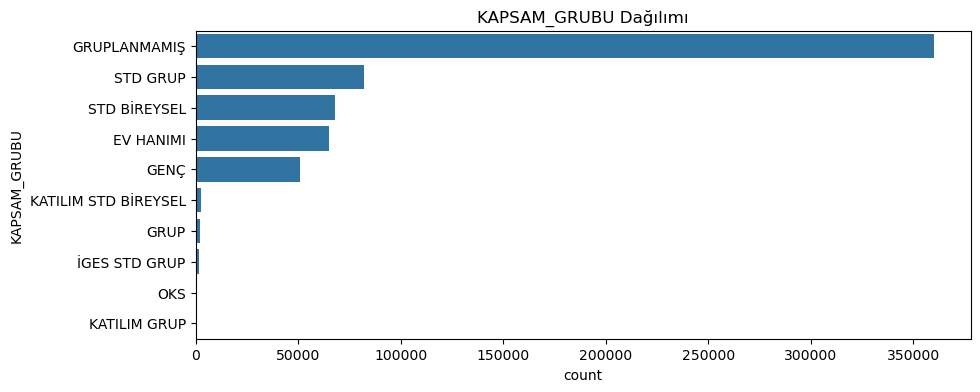

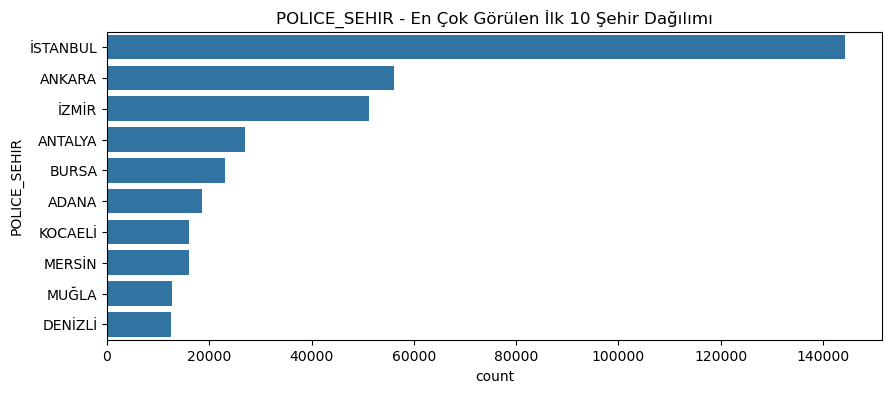

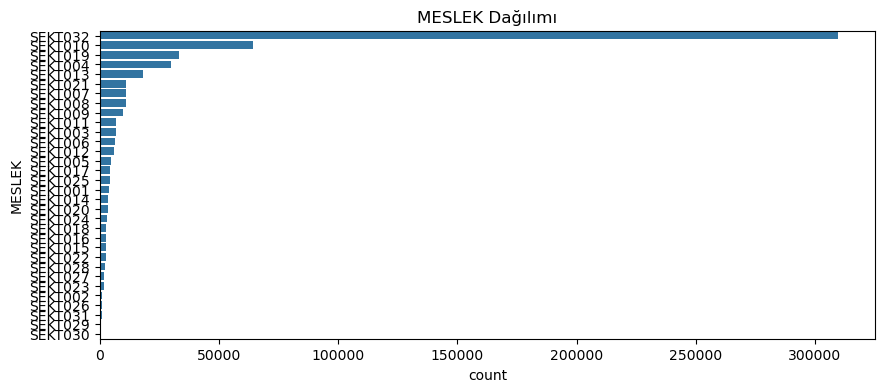

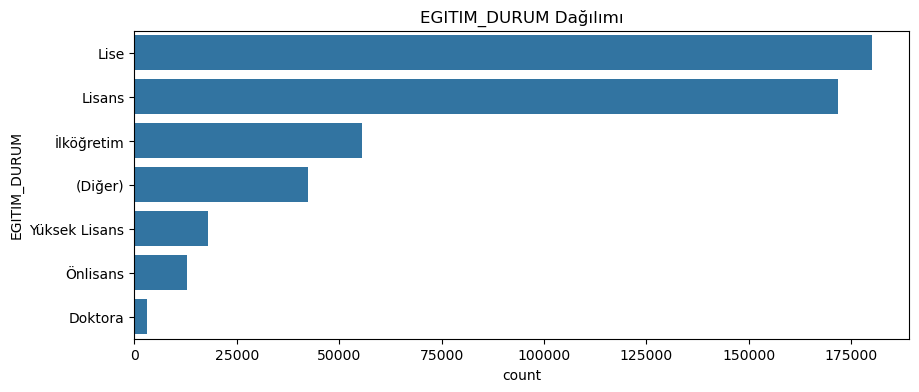

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ["KAPSAM_GRUBU", "POLICE_SEHIR", "MESLEK", "EGITIM_DURUM"]

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    if col == "POLICE_SEHIR":
        top_10_cities = df["POLICE_SEHIR"].value_counts().index[:10]
        sns.countplot(
            y=col,
            data=df[df["POLICE_SEHIR"].isin(top_10_cities)],
            order=top_10_cities
        )
        plt.title(f"{col} - En Çok Görülen İlk 10 Şehir Dağılımı")
    else:
        sns.countplot(
            y=col,
            data=df,
            order=df[col].value_counts().index
        )
        plt.title(f"{col} Dağılımı")
    plt.show()

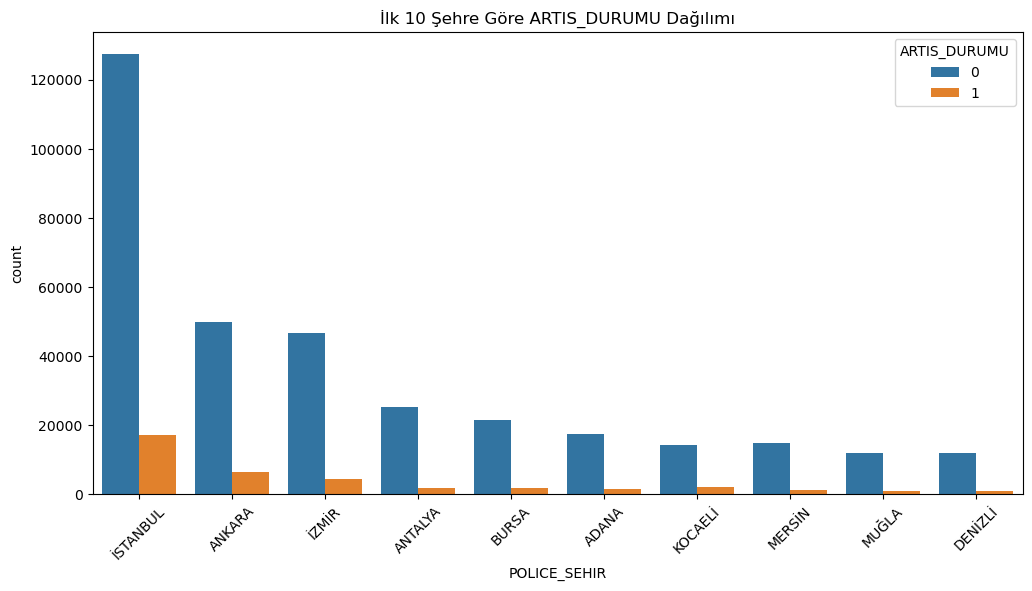

In [53]:
top_10_cities = df_islenmis["POLICE_SEHIR"].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.countplot(
    x="POLICE_SEHIR",
    hue="ARTIS_DURUMU",
    data=df_islenmis[df_islenmis["POLICE_SEHIR"].isin(top_10_cities)],
    order=top_10_cities
)
plt.xticks(rotation=45)
plt.title("İlk 10 Şehre Göre ARTIS_DURUMU Dağılımı")
plt.show()

FEATURE ENGINEERING VE VERİ ÖN İŞLEME


In [54]:
odenen_tutar_columns = [col for col in df_islenmis.columns if "ODENEN_TUTAR" in col]
vade_tutari_columns = [col for col in df_islenmis.columns if "VADE_TUTAR" in col]
df_sonuc_od = df_islenmis[odenen_tutar_columns].sum(axis=1)
df_sonuc_vade = df_islenmis[vade_tutari_columns].sum(axis=1)

df_sonuc_islenmis = df_islenmis.copy()
df_sonuc_islenmis["ODENEN_TUTAR_TOPLAM"] = df_sonuc_od
df_sonuc_islenmis["VADE_TUTAR_TOPLAM"] = df_sonuc_vade
df_sonuc_islenmis["ODENEN_TUTAR_TOPLAM"] =df_sonuc_islenmis["ODENEN_TUTAR_TOPLAM"].astype(float)

#df_sonuc_islenmis[df_sonuc_islenmis["POLICY_ID"] == 8167943 ]

In [55]:
#iptal poliçeleri bulma

fark = df_sonuc_islenmis['VADE_TUTAR_TOPLAM'] - df_sonuc_islenmis['ODENEN_TUTAR_TOPLAM'] 

# son 3 ay ödenmeyenleri iptal olarak kabul ettim. Duruma göre vade > odenen tutar da edilebilirdi.
df_sonuc_islenmis["T_I"] = df_sonuc_islenmis[["ARALIK_ODENEN_TUTAR", "KASIM_ODENEN_TUTAR", "EKIM_ODENEN_TUTAR"]].sum(axis=1) == 0
#df_sonuc_islenmis['T_I'] = np.where(fark.isna(), 'Eksik', np.where(fark < 100, 'T', 'I'))


print(f"toplamdan gidilen {df_sonuc_islenmis['T_I'].value_counts()}")
print(f"son 3 ayda sıfır olan değerler {df_sonuc_islenmis['CHURN'].value_counts()}")






toplamdan gidilen T_I
False    357798
True     265602
Name: count, dtype: int64


KeyError: 'CHURN'

In [ ]:
#ARTIŞ DURUMU kontrol edilerek ödeme yapılmayıp ama beste 2021 yılı ilk çeyreginde artış gösteren poliçeler bulunmaktadır. Bunlar bizim ödenmeyen poliçeler iptaldir kabulümüze uygun degildir bu sebeple veriden çıkarılacaktır.
# modelde kullanacağımız değişkenleri belirliyoruz
#bir sonraki çeyrekte artmış hem de ödenmemiş poliçeleri bulma ayırma

DF_MODEL_AYKIRI = df_sonuc_islenmis[(df_sonuc_islenmis['T_I'] == 'I') & (df_sonuc_islenmis["ARTIS_DURUMU"] == 1) ]
df_sonuc_islenmis = df_sonuc_islenmis.drop(DF_MODEL_AYKIRI.index)
print(DF_MODEL_AYKIRI)


#print(DF_MODEL_AYKIRI[DF_MODEL_AYKIRI['POLICY_ID'] == 1000283])



     




        POLICY_ID  OFFICE_ID  SIGORTA_TIP SOZLESME_KOKENI  \
13        8691355      10129            1             NEW   
78        4160609      10034            6             NEW   
137       9600650      10907            1             NEW   
292       7110359      11170            1             NEW   
426       1671999      10073            1             NEW   
427       5263709      11248            1             NEW   
446       3669036      10213            1             NEW   
456       6283859      10813            1             NEW   
463       5255200      10459            7             NEW   
601       6070286      10023            7             NEW   
658       9780842      11331            1             NEW   
719       3031395      10621            1             NEW   
727       8405869      10644            1             NEW   
1042      2131872      10006            7             NEW   
1119      7510980      10006            8             NEW   
1186      2235111      1

In [ ]:
#q1'den sonra iptal edilen poliçeleri bulma bunu beste direk iptal edilen poliçelerden ayırıp incelemek için yapıyoruz.

# İlk 3 ayın ödenen ve vade tutarı sütunları
q1_aylar = ["OCAK", "SUBAT", "MART"]
q1_odenen = [f"{ay}_ODENEN_TUTAR" for ay in q1_aylar]
q1_vade = [f"{ay}_VADE_TUTARI" for ay in q1_aylar]

# Sonraki aylar
devam_aylar = ["NISAN", "MAYIS", "HAZIRAN", "TEMMUZ", "AGUSTOS", "EYLUL", "EKIM", "KASIM", "ARALIK"]
devam_odenen = [f"{ay}_ODENEN_TUTAR" for ay in devam_aylar]
devam_vade = [f"{ay}_VADE_TUTARI" for ay in devam_aylar]

# İlk 3 ayda tam ödeme yapılmış mı?
ilk_uc_ay_tam_odeme = (df_sonuc_islenmis[q1_odenen].values == df_sonuc_islenmis[q1_vade].values).all(axis=1)

# Devam eden aylardan herhangi birinde eksik ödeme var mı?
devamda_eksik_odeme = (df_sonuc_islenmis[devam_odenen].values < df_sonuc_islenmis[devam_vade].values).any(axis=1)

# Koşulu sağlayan poliçeler
sonuc = df_sonuc_islenmis[ilk_uc_ay_tam_odeme & devamda_eksik_odeme]
aylar = ["OCAK", "SUBAT", "MART","NISAN", "MAYIS", "HAZIRAN", "TEMMUZ", "AGUSTOS", "EYLUL", "EKIM", "KASIM", "ARALIK"]
odenen = [f"{ay}_ODENEN_TUTAR" for ay in aylar]
vade = [f"{ay}_VADE_TUTARI" for ay in aylar]

sonuc["ODENEN_TOPLAM"] = sonuc[odenen].sum(axis=1)
sonuc["ODENEN_VADE"] = sonuc[vade].sum(axis=1)
print(sonuc[['POLICY_ID'] + q1_odenen + q1_vade + devam_odenen + devam_vade + ["ODENEN_TOPLAM", "ODENEN_VADE"]])


vm_csv = sonuc[['POLICY_ID'] + q1_odenen + q1_vade + devam_odenen + devam_vade + ["ODENEN_TOPLAM", "ODENEN_VADE",'T_I']]
print(vm_csv.columns)
#vm_csv.to_excel("C:\\Users\\melih.bayraktaroglu\\Desktop\\vm2_csv.xlsx", index=False)

C:\Users\melih\AppData\Local\Temp\ipykernel_27644\411947353.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["ODENEN_TOPLAM"] = sonuc[odenen].sum(axis=1)
C:\Users\melih\AppData\Local\Temp\ipykernel_27644\411947353.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["ODENEN_VADE"] = sonuc[vade].sum(axis=1)


        POLICY_ID  OCAK_ODENEN_TUTAR  SUBAT_ODENEN_TUTAR  MART_ODENEN_TUTAR  \
49        8027538                 89                  89                 89   
124       2855262                160                 160                160   
141       6579220                810                 810                810   
147       1993563                280                 280                280   
399       9834444                160                 160                160   
417       1322122                190                 160                190   
521       3811194                540                 540                540   
652       8132615                220                 220                220   
817       6606422                150                 150                150   
1035      3241354                260                 260                260   
1267      6542385                 98                  98                 98   
1274      9292578                230                

OSError: Cannot save file into a non-existent directory: 'C:\Users\melih.bayraktaroglu\Desktop'

In [59]:
df_ml = df_sonuc_islenmis.drop(columns=odenen_tutar_columns + vade_tutari_columns , inplace=False)


print(df_ml.columns)





Index(['POLICY_ID', 'OFFICE_ID', 'SIGORTA_TIP', 'SOZLESME_KOKENI',
       'SOZLESME_KOKENI_DETAY', 'BASLANGIC_TARIHI', 'KAPSAM_TIPI',
       'KAPSAM_GRUBU', 'DAGITIM_KANALI', 'POLICE_SEHIR', 'DOGUM_TARIHI',
       'CINSIYET', 'UYRUK', 'MEMLEKET', 'MESLEK', 'MESLEK_KIRILIM',
       'MUSTERI_SEGMENTI', 'YATIRIM_KARAKTERI', 'MEDENI_HAL', 'EGITIM_DURUM',
       'GELIR', 'COCUK_SAYISI', 'SENE_BASI_HESAP_DEGERI',
       'SENE_SONU_HESAP_DEGERI', 'ARTIS_DURUMU', 'ODENEN_TUTAR_TOPLAM',
       'VADE_TUTAR_TOPLAM', 'T_I'],
      dtype='object')


In [66]:
print(df_ml["SOZLESME_KOKENI_DETAY"].value_counts())
print(df_ml["KAPSAM_TIPI"].value_counts())  


SOZLESME_KOKENI_DETAY
NEW          602394
TRANS         10609
TRANS_TR       2237
NEW_MRG        1612
INV_PROC        295
TRANS_MRG        48
NEW_TR           17
TRANS_T2         10
TR_T2_TR          5
TRANS_C           1
Name: count, dtype: int64
KAPSAM_TIPI
PENSION247    65422
PENSION215    57162
PENSION251    50563
PENSION001    45386
PENSION059    45306
PENSION056    43514
PENSION312    36877
PENSION195    35368
PENSION305    33232
PENSION121    22786
PENSION243    15778
PENSION202    15332
PENSION052    12647
PENSION250     9551
PENSION301     8462
PENSION249     8272
PENSION194     7503
PENSION238     6331
PENSION245     5648
PENSION144     5178
PENSION318     4948
PENSION100     4500
PENSION118     3830
PENSION123     3618
PENSION142     3604
PENSION125     3464
PENSION274     3242
PENSION169     2884
PENSION295     2832
PENSION404     2332
PENSION296     2287
PENSION401     2032
PENSION423     1946
PENSION419     1794
PENSION101     1769
PENSION252     1693
PENSION199     1673


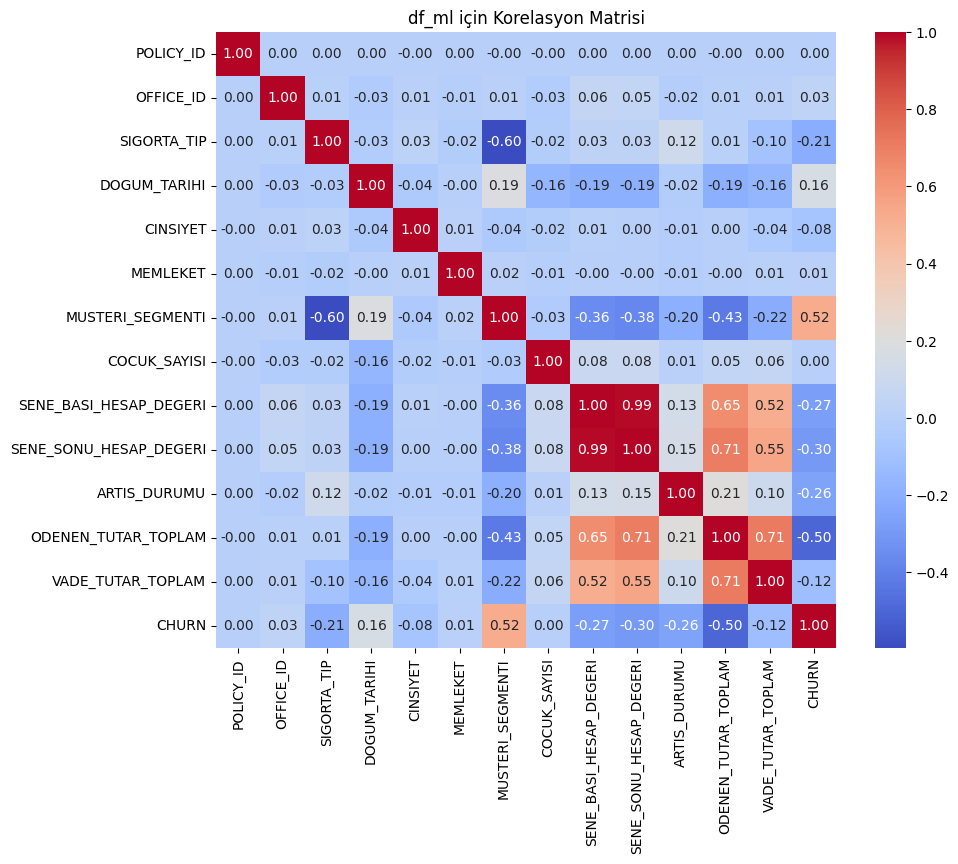

In [25]:
# ...existing code...

plt.figure(figsize=(10, 8))
corr = df_ml.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("df_ml için Korelasyon Matrisi")
plt.show()



# ...existing code...

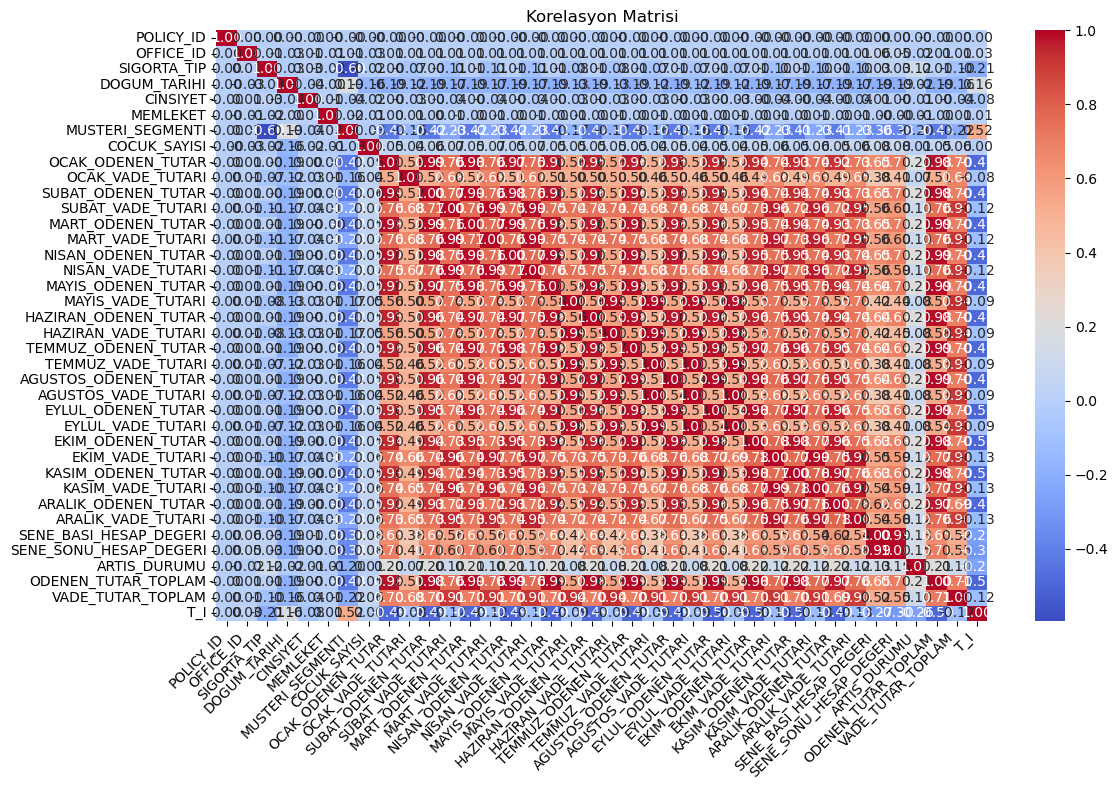

AttributeError: 'DataFrame' object has no attribute 'feature_importances_'